### Welcome to the Southern Water Corp Python Case Study!

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

Don't forget that to modify the matplotlib plot sizes so they're at a comfortable reading size you should use the following:

**import matplotlib as mpl**

**mpl.rcParams['figure.figsize'] = (20,5)**

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

## Place your code here

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.

i. Import each of the two data sources and store them into their individual dataframes. 
Suggested names: **dataframe_raw & dataframe_stdev respectively**. 
Don't forget to use the **header** argument to ensure your columns have meaningful names! 

ii. Print descriptive statistics for each of the dataframes using **.describe()** and **.info()**

In [3]:
# Import each of the two dataframes and store them
datapath = 'C:/Users/Akhil/Documents/Python Project/SWC_python/SWC_Updated_Case_Study_Python'
dataframe_raw = pd.read_csv(datapath + r'/DF_Raw_Data.csv',parse_dates=["TIMEFRAME (DD/MM/YYYY)"])
dataframe_stdev = pd.read_csv(datapath + r'/DF_Rolling_Stdev.csv')
df_raw=[dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1)]
print(type(dataframe_raw))
mpl.rcParams['figure.figsize'] = (20,5)

<class 'pandas.core.frame.DataFrame'>


In [4]:
#Description of Raw Data
print(dataframe_raw.describe())
print(dataframe_raw.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

In [5]:
# dataframe_stdev['Pump Torque'] = df_stdev_f['Pump Torque'].astype(float)
testing= dataframe_stdev.drop(['Volumetric Flow Meter 1','Data Source','TIMEFRAME (DD/MM/YYYY)',
                              'Volumetric Flow Meter 2','Pump Speed (RPM)','Ambient Temperature','Horse Power',
                               'Pump Efficiency','PUMP FAILURE (1 or 0)'],axis=1)
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pump Torque   2452 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [6]:
dataframe_stdev['Pump Torque ']


0       11.70
1       11.73
2       11.94
3       12.10
4       12.31
        ...  
2447    14.10
2448    13.45
2449    14.86
2450     5.51
2451     7.07
Name: Pump Torque , Length: 2452, dtype: float64

In [7]:
# Description of Stdev Data
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2452.000000              2452.000000       2452.000000   
mean                  1.485126                 1.497361          6.648308   
std                   2.294950                 2.282053          5.722897   
min                   0.380000                 0.640000          0.580000   
25%                   1.070000                 1.080000          5.520000   
50%                   1.160000                 1.170000          5.990000   
75%                   1.230000                 1.260000          6.460000   
max                  21.390000                21.530000         59.310000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2452.000000          2452.000000   2452.00000      2452.000000   
mean      13.945338             3.436370      0.37060         2.725232   
std       12.394302             3.043042      0.29979         4.186723   
min       

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data from the **.info** command you used previously.

You should now also have a rough sense of the number of entires in each dataset (~2,452). However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables you created into a boxplot by following these instructions:

i) Using the dataframe_raw, create a boxplot visualising this information.

ii) Using the dataframe_raw, create a lineplot visualising this information.

Hint: You might want to reference the following .plot function (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

### Please put your code here


#### We've included an example of what your Box Plot *should* look like once you've plotted this using the dataframe_raw dataset

['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']


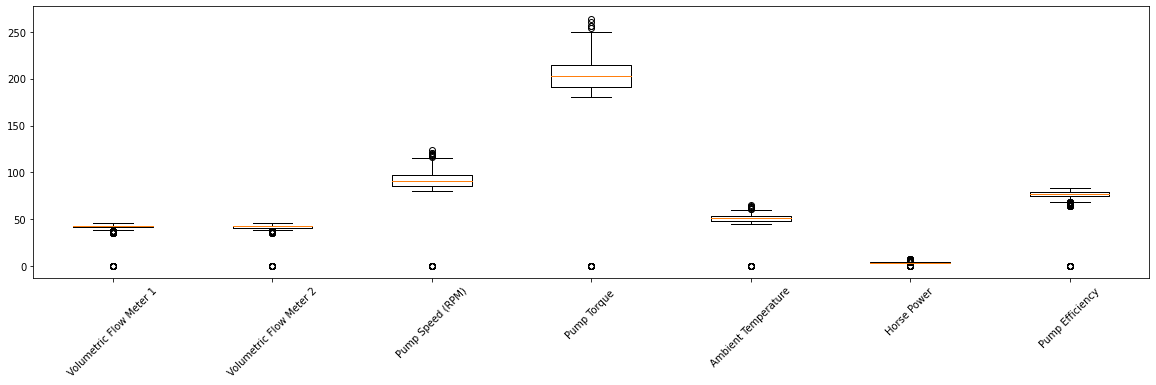

In [8]:
# Creating xtick labels
xticklist=dataframe_raw.columns.to_list()[2:-1]
print(xticklist)

# Creatin Box plot of Raw Data
fig,ax=plt.subplots()
ax.boxplot(dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)','PUMP FAILURE (1 or 0)'],axis=1))
ax.set_xticklabels(xticklist, rotation = 45)
plt.show()

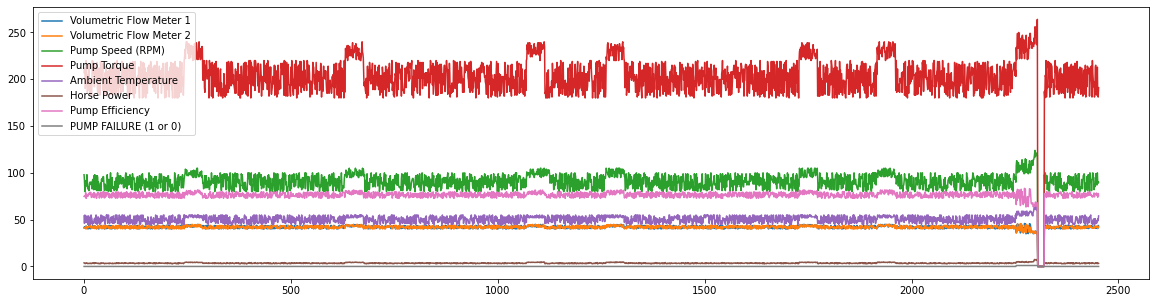

In [9]:
# Creating Line plot
fig,ax=plt.subplots()
ax.plot(dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1))
ax.legend(['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)',
           'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency','PUMP FAILURE (1 or 0)'], loc='upper left')
plt.show()

### **What have you observed from the boxplot and line plots?**

Looking at the box plots we obeserve that there are outliers in our dataset.
Looking at the line plots we observe a sudden drop in values of Pump Torque after its value goes upon 250.
In both plots there is different size of values for each variable and this makes it diffuclt to make futher observations.

### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see. 

### More importantly, the dataset we do have contains Pump Failure Data where it has failed (i.e. Pump Failure = 0) as well as when it is operating normally. We should separate this data accordingly to more effectively visualise the information.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe.



## Please put your code here

In [10]:
# Using the dataframe_raw dataset, create two boxplots specifically for when the pump has failed and when the pump is working normally.
df_raw=dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1)
df_raw.head()
#Converted PUMP FAILURE (1 or 0) datatype to boolean
df_raw["PUMP FAILURE (1 or 0)"].astype('bool')
df_raw0=df_raw[df_raw['PUMP FAILURE (1 or 0)']== 0]
df_raw1=df_raw[df_raw['PUMP FAILURE (1 or 0)']== 1]
# dataset with pump failure = 0
print(df_raw0)
# dataset with pump failure = 1
print(df_raw1)

xticklist0=df_raw0.columns.to_list()[:-1]
xticklist0

xticklist1=df_raw1.columns.to_list()[:-1]
xticklist1




      Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
0                       41.30                    41.16                98   
1                       42.40                    41.39                92   
2                       41.43                    41.15                80   
3                       42.21                    40.93                83   
4                       40.51                    43.32                90   
...                       ...                      ...               ...   
2448                    40.75                    41.61                87   
2449                    41.32                    42.34               100   
2450                    40.53                    40.68                89   
2451                    43.82                    42.87                89   
2452                    43.28                    41.96                90   

      Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
0             

['Volumetric Flow Meter 1',
 'Volumetric Flow Meter 2',
 'Pump Speed (RPM)',
 'Pump Torque ',
 'Ambient Temperature',
 'Horse Power',
 'Pump Efficiency']

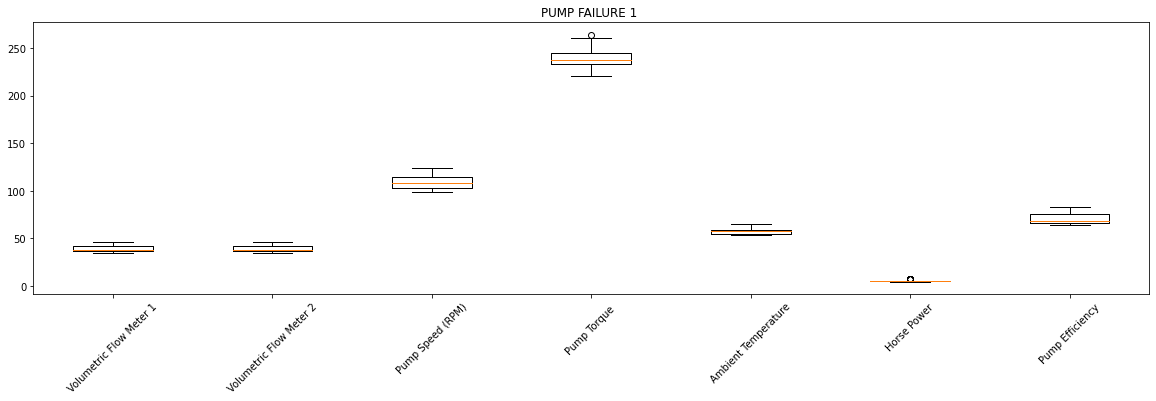

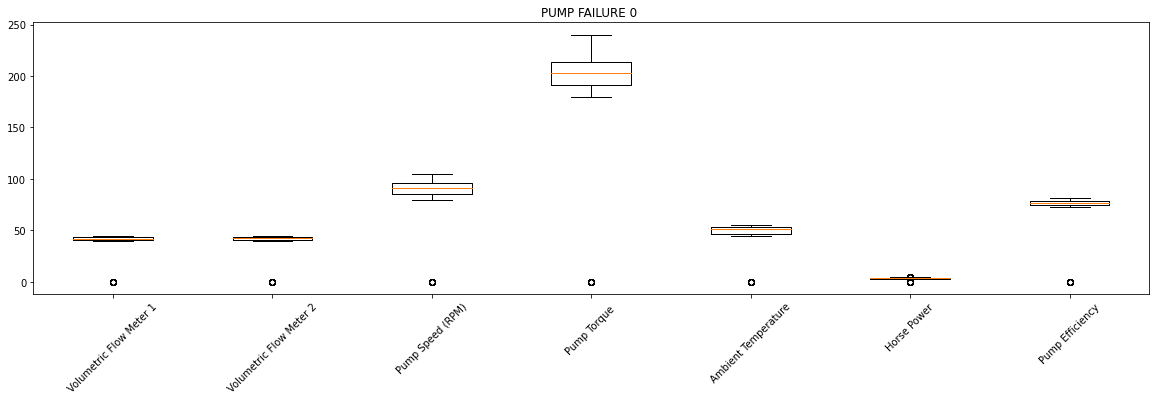

<function matplotlib.pyplot.clf()>

In [11]:
# Create two boxplots specifically for when the pump has failed and when the pump is working normally.
fig,ax=plt.subplots()
ax.boxplot(df_raw1.drop(['PUMP FAILURE (1 or 0)'],axis=1))
ax.set_xticklabels(xticklist1, rotation = 45)
ax.set_title('PUMP FAILURE 1 ')
plt.show()

fig,ax=plt.subplots()
ax.boxplot(df_raw0.drop(['PUMP FAILURE (1 or 0)'],axis=1))
ax.set_xticklabels(xticklist0, rotation = 45)
ax.set_title('PUMP FAILURE 0 ')
plt.show()

**Open-ended Question:**
### What have you noticed when you compared the dataset in this manner?

Box plots datapoints for both failure and normal data seems scattered and looks consistant.
IQR of Pump Torque is higher for Pump failure as compared to when pump is normally functioning.
IQR of Pump Efficiency is higher when Pump is functioning normally comparitive  to when pump has failed.

### From analysing the boxplots, you might notice that there seem to be a number of outliers. We might want to see if we can actively remove this with Python. 
When you did this work in Excel, you used the interquartile ranges to remove the outliers from each column. Happily, Python allows you to do this same process more quickly and efficiently, as you'll see when working on  <span style="color:green">Step 5</span>.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

## Please put your code here

In [12]:
df_raw = dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1)
Q1=df_raw.quantile(.25)
Q3=df_raw.quantile(.75)
print(Q1, Q3)
IQR=Q3-Q1
print(IQR)

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64 Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.



## Please put your code here

Nuumber of entries in current dataframe : 2453
Number of entries after removing outliers : 2358
Number of outliers : 95


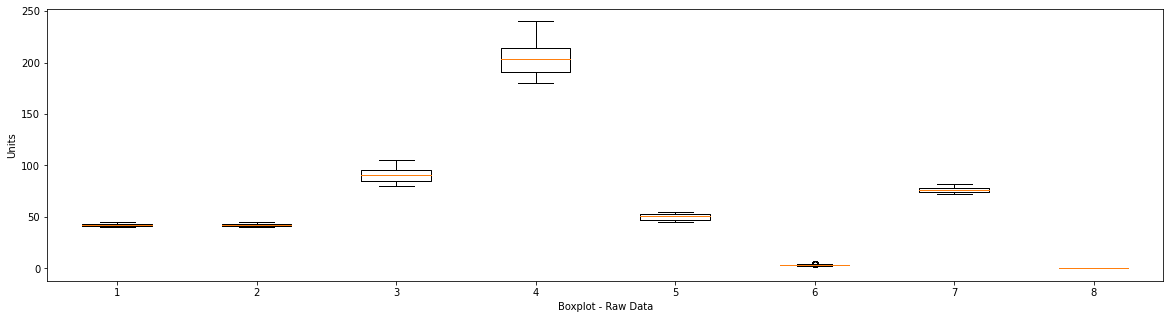

In [13]:
df_raw_filtered = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Nuumber of entries in current dataframe : ' + str(len(df_raw.index)))
print('Number of entries after removing outliers : ' + str(len(df_raw_filtered.index)))
no_of_outliers=len(df_raw.index)-len(df_raw_filtered.index)
print('Number of outliers : ' + str(no_of_outliers))

mpl.rcParams['figure.figsize'] = (20,5)
plt.boxplot(df_raw_filtered)
plt.xlabel('Boxplot - Raw Data')
plt.ylabel('Units')
plt.show()

### Having removed the outliers from the dataset - do we think this is a good option? Why or why not?

Removing the outliers in data has significant impact on overall analysis.
It help in providing better analysis and produced unbaised results.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1 (Check what the **length** of the dataframe is before you try and plot this. You may be surprised!)

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand. If you remove all the outliers - you might discover you have nothing to plot...!


## Please put your code here

In [14]:
df_raw_filtered
#Converted PUMP FAILURE (1 or 0) datatype to boolean
df_raw_filtered["PUMP FAILURE (1 or 0)"].astype('bool')
df_rawf0=df_raw_filtered[df_raw_filtered['PUMP FAILURE (1 or 0)']== 0]
df_rawf1=df_raw_filtered[df_raw_filtered['PUMP FAILURE (1 or 0)']== 1]
print(df_rawf0)
print(df_rawf1)

      Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
0                       41.30                    41.16                98   
1                       42.40                    41.39                92   
2                       41.43                    41.15                80   
3                       42.21                    40.93                83   
4                       40.51                    43.32                90   
...                       ...                      ...               ...   
2448                    40.75                    41.61                87   
2449                    41.32                    42.34               100   
2450                    40.53                    40.68                89   
2451                    43.82                    42.87                89   
2452                    43.28                    41.96                90   

      Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
0             

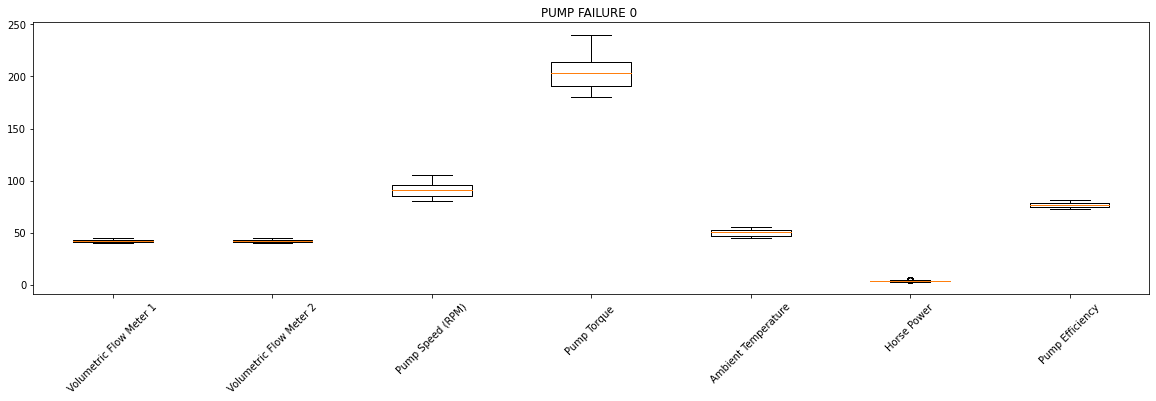

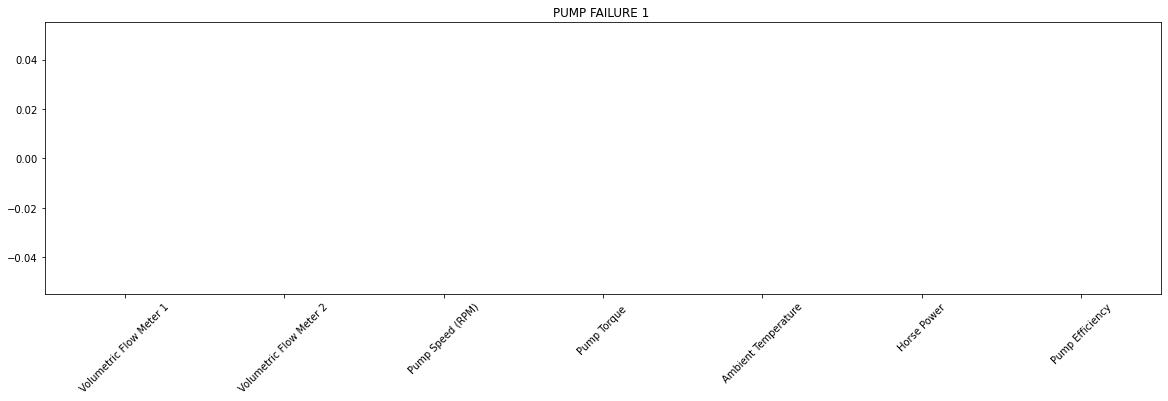

In [15]:
xticklistf0=df_raw0.columns.to_list()[:-1]
xticklistf0

xticklistf1=df_raw1.columns.to_list()[:-1]
xticklistf1

fig,ax=plt.subplots()
ax.boxplot(df_rawf0.drop(['PUMP FAILURE (1 or 0)'],axis=1))
ax.set_xticklabels(xticklistf0, rotation = 45)
ax.set_title('PUMP FAILURE 0 ')
plt.show()
plt.clf

fig,ax=plt.subplots()
ax.boxplot(df_rawf1.drop(['PUMP FAILURE (1 or 0)'],axis=1))
ax.set_xticklabels(xticklistf1, rotation = 45)
ax.set_title('PUMP FAILURE 1 ')
plt.show()

### Based on the boxplots you've created, you've likely come to the conclusion that, for this case study, you actually _shouldn't_ remove the outliers, as you are attempting to understand the Pump Failure Behavior and the portion of data you need is actually stored WITHIN the Outliers.

### This is exactly why you should never remove Outliers without Subject Matter Expertise input. Otherwise valuable information may be discarded.

-----

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure.

This will require you to make use of the following syntax:

#### for variable in listOfVariables:
    #Loop through each variable in the dataframe (i.e. dataframe[___].plot
    #Specify the dual-axis (i.e. ax.twinx())
    #Plot the Pump Failure (1 or 0) on the secondary axes
    #Include Plot Titles for each plot (i.e. print ("This is for the attribute " + i))
    
#### Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. It might be helpful to give the failureState it's own color and add a legend to the axis to make it easier to view. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html

##### Note: Please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

In [16]:
dataframe_raw.head()


,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,2014-09-12 00:00:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,2014-09-12 00:01:00,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,2014-09-12 00:02:00,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,2014-09-12 00:03:00,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,2014-09-12 00:04:00,40.51,43.32,90,195,50,3.34,78.76,0


## Please put your code here

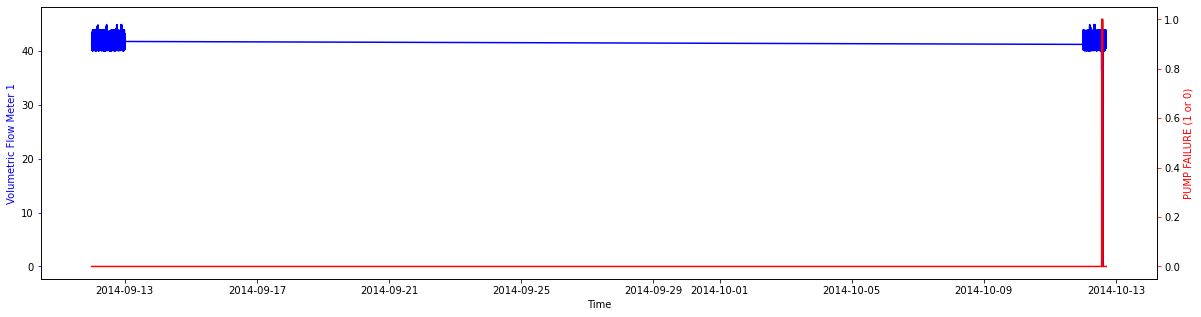

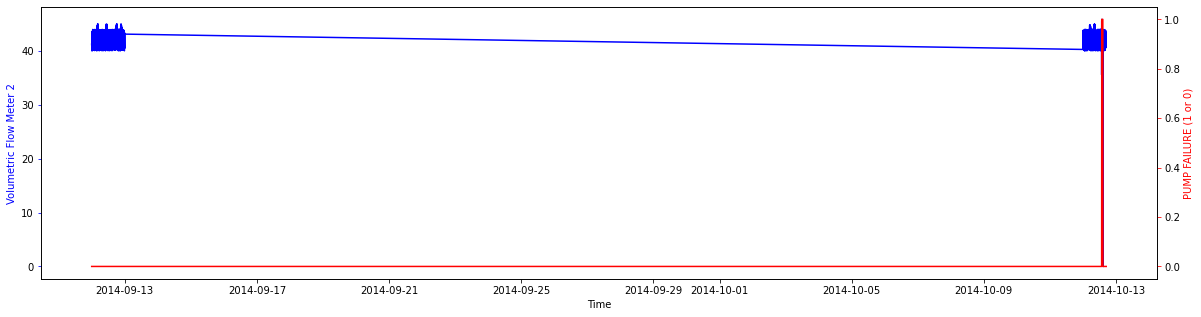

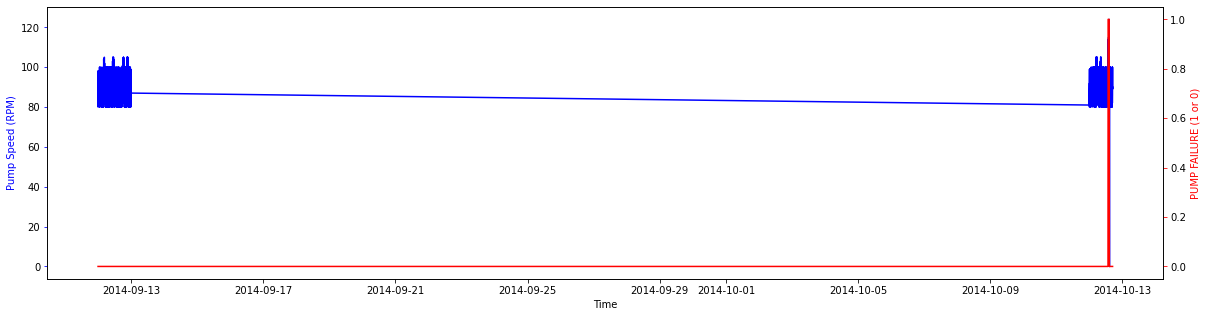

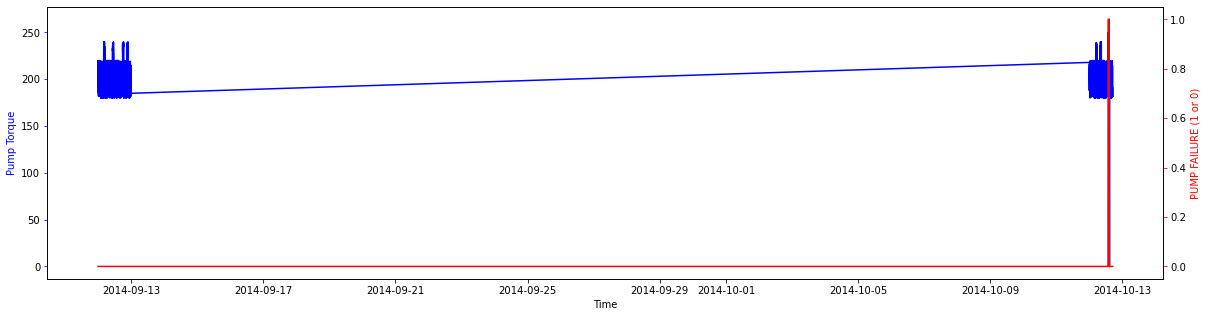

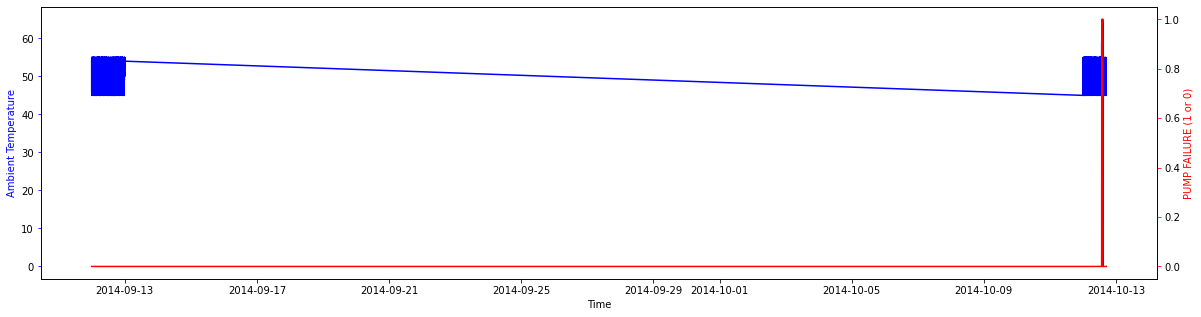

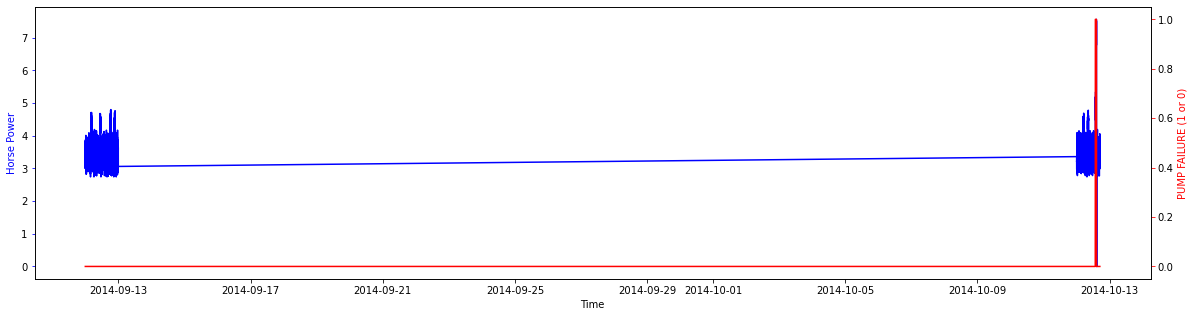

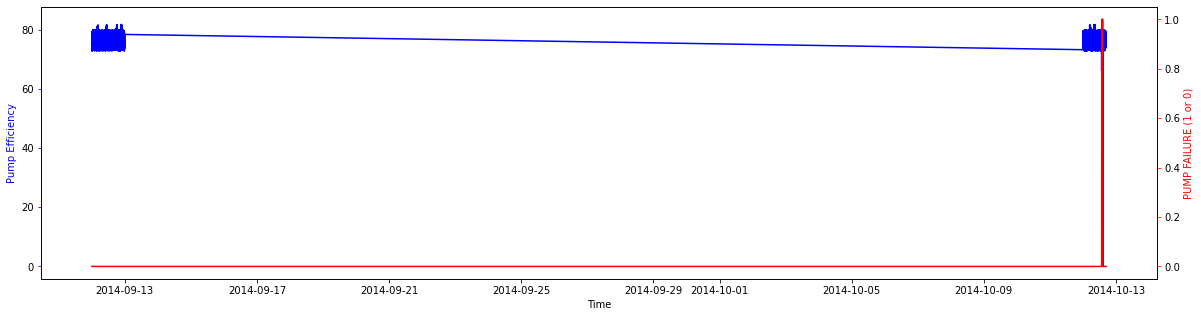

In [17]:
def plot_timeseries(axes,df, y_col, color, xlabel, ylabel):
    df=df.copy()
    df.set_index(['TIMEFRAME (DD/MM/YYYY)'], inplace=True, drop=True)
    x=df.index
    y=df[y_col]
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', color=color)

mpl.rcParams['figure.figsize'] = (20,5)

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Volumetric Flow Meter 1','blue','Time',
                'Volumetric Flow Meter 1')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Volumetric Flow Meter 2','blue','Time',
                'Volumetric Flow Meter 2')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Pump Speed (RPM)','blue','Time',
                'Pump Speed (RPM)')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw,'Pump Torque ','blue','Time',
                'Pump Torque')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Ambient Temperature','blue','Time',
                'Ambient Temperature')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Horse Power','blue','Time',
                'Horse Power')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries(ax,dataframe_raw, 'Pump Efficiency','blue','Time',
                'Pump Efficiency')
ax2=ax.twinx()
plot_timeseries(ax2,dataframe_raw, 'PUMP FAILURE (1 or 0)','red', 'Time',
                'PUMP FAILURE (1 or 0)')
plt.show()

### What do you notice when looking at the data in this way? Do any particular trends emerge?


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period. 

This is where we will switch to using the dataframe_stdev that you had previously defined in Q1.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.
Make sure that you include the 'PUMP FAILURE 1 or 0' attribute on the secondary Y-axis. 

#### Hint: Remember to make use of the Dual-Axis plot trick you learned in the previous exercise!


---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index** of the dataframe to the TIMEFRAME (DD/MM/YYYY) attribute


ii) Exactly as you did in Q8, Re-plot all variables, now transformed via a rolling standard deviation in the dataframe_stdev for the time period 10/12/2014 13:30 to 10/12/2014 14:30 against Pump Failure.

Note: To effectively filter on the time period you will need to make use of the below syntax
    # dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")


## Please put your code here

### The output from your code should display image(s) like the one shown below

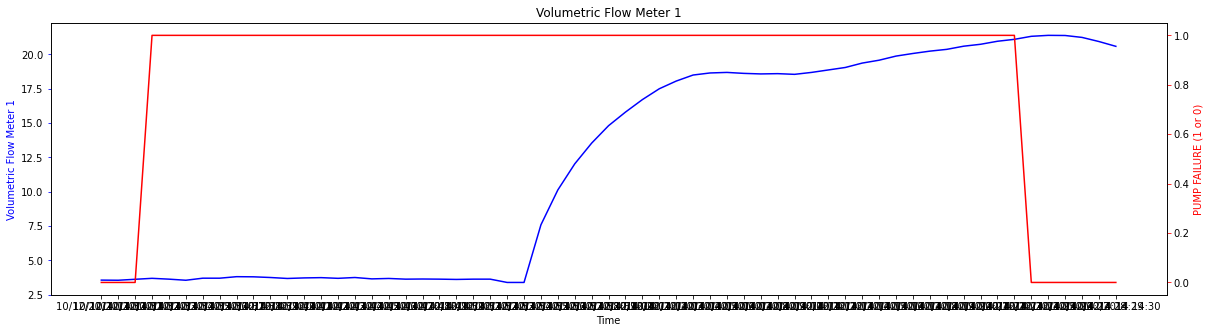

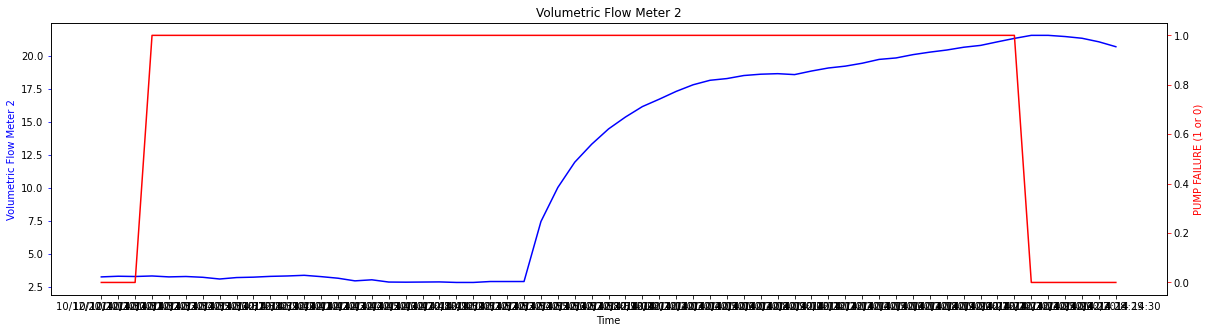

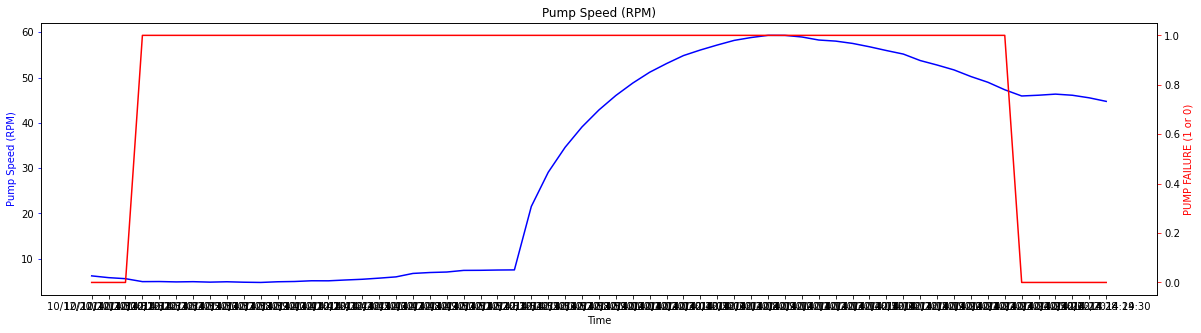

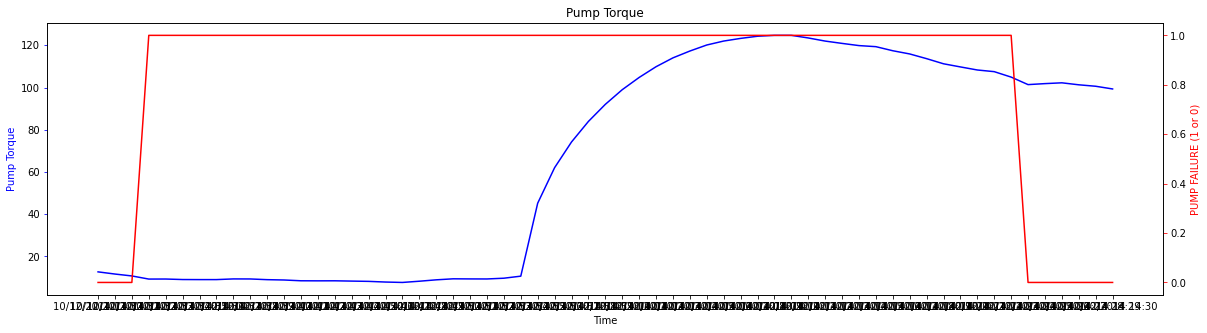

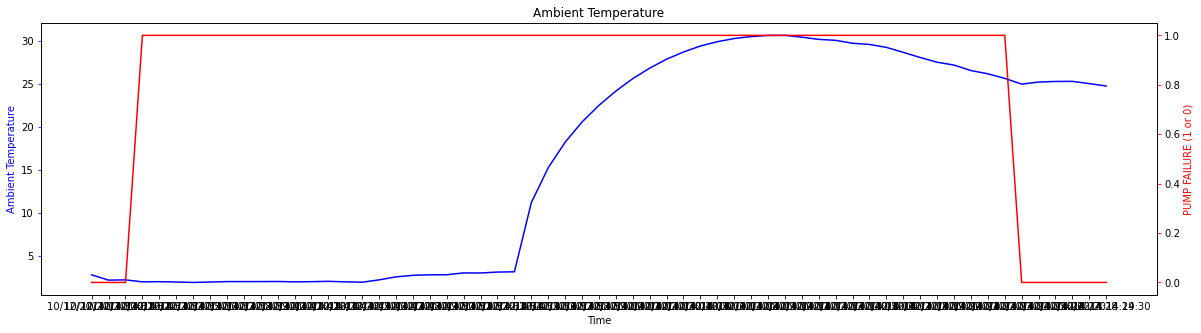

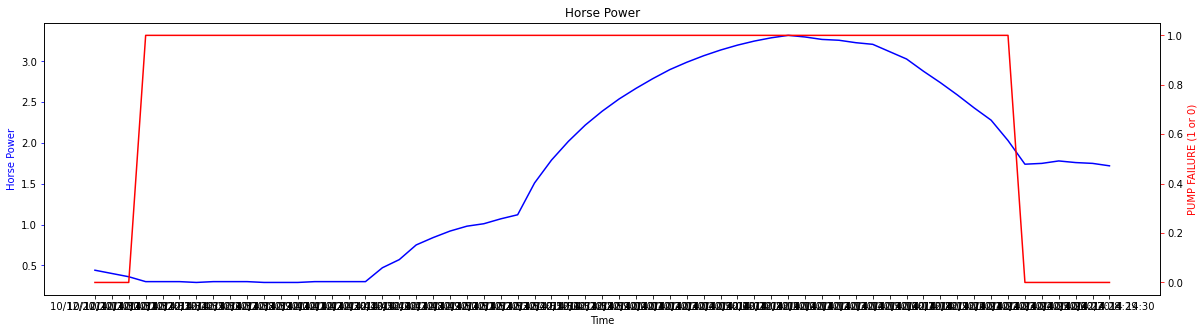

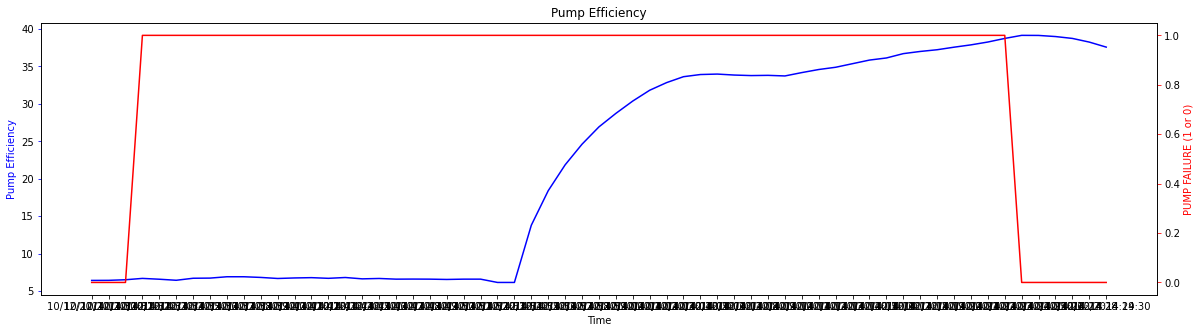

In [18]:
df_stdev_f=dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

df_stdev_filtered = df_stdev_f[(df_stdev_f.index >="10/12/2014 13:30")&(df_stdev_f.index <="10/12/2014 14:30")]


def plot_timeseries1(axes,x,y,color,xlabel,ylabel) :
    axes.plot(x,y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color=color)
    axes.tick_params('y',color=color)
    
fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Volumetric Flow Meter 1'],'blue','Time','Volumetric Flow Meter 1')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Volumetric Flow Meter 1')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Volumetric Flow Meter 2'],'blue','Time','Volumetric Flow Meter 2')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Volumetric Flow Meter 2')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Pump Speed (RPM)'],'blue','Time','Pump Speed (RPM)')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Pump Speed (RPM)')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Pump Torque '],'blue','Time','Pump Torque')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Pump Torque')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Ambient Temperature'],'blue','Time','Ambient Temperature')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Ambient Temperature')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Horse Power'],'blue','Time','Horse Power')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Horse Power')
plt.show()
plt.clf

fig,ax=plt.subplots()
plot_timeseries1(ax,df_stdev_filtered.index, df_stdev_filtered['Pump Efficiency'],'blue','Time','Pump Efficiency')
ax2=ax.twinx()
plot_timeseries1(ax2,df_stdev_filtered.index, df_stdev_filtered['PUMP FAILURE (1 or 0)'],'red','Time','PUMP FAILURE (1 or 0)')
plt.title('Pump Efficiency')
plt.show()


---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_raw dataset.


Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Please put your code here

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
Volumetric Flow Meter 1                 1.000000                 0.893058   
Volumetric Flow Meter 2                 0.893058                 1.000000   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Horse Power                             0.470081                 0.462087   
Pump Efficiency                         0.913014                 0.980144   
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
Volumetric Flow Meter 1          0.674691      0.700425             0.713913   
Volumetric Flow Meter 2          0.671896      0.692183             0.710423   
Pump Speed (RPM)                 1.000000      0.711037           

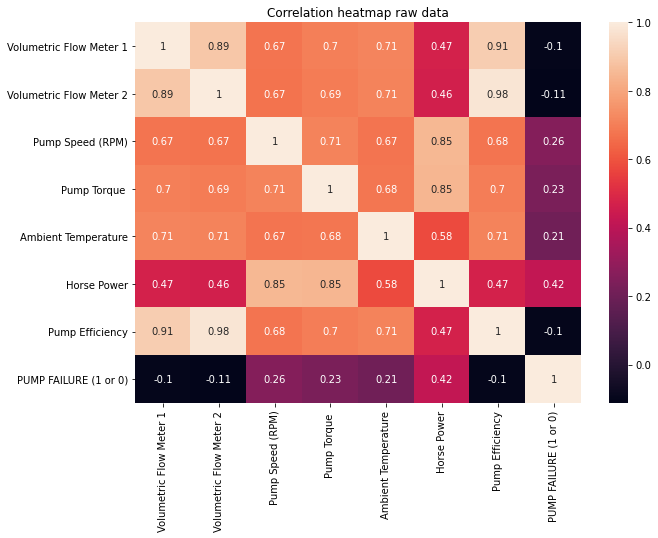

Text(0.5, 1.0, 'R Square heatmap raw data')

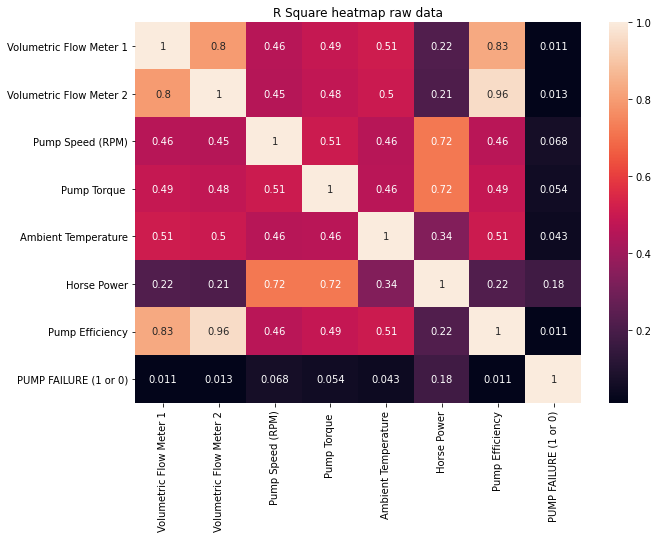

In [19]:
print(dataframe_raw.corr())
  
# plotting correlation heatmap
mpl.rcParams['figure.figsize'] = (10,7)
dataplot_raw = sns.heatmap(dataframe_raw.corr(), annot=True)
plt.title('Correlation heatmap raw data')
# displaying heatmap
plt.show()

# R Square raw data
df_corr= dataframe_raw.corr()
df_corr[:] **2
sns.heatmap(df_corr[:] **2, annot=True)
plt.title('R Square heatmap raw data')

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?


Horse power has highest correlation of 0.42 with pump Failure for Raw Data.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

You can do this with the matplotlib library when you specify matplotlib.pyplot(kind='bar')


### Please put your code here

PUMP FAILURE (1 or 0)      1.000000
Horse Power                0.421694
Pump Speed (RPM)           0.260016
Pump Torque                0.233193
Ambient Temperature        0.207946
Volumetric Flow Meter 1   -0.102508
Pump Efficiency           -0.102696
Volumetric Flow Meter 2   -0.112115
Name: PUMP FAILURE (1 or 0), dtype: float64


Text(0, 0.5, 'Correlation Coefficient')

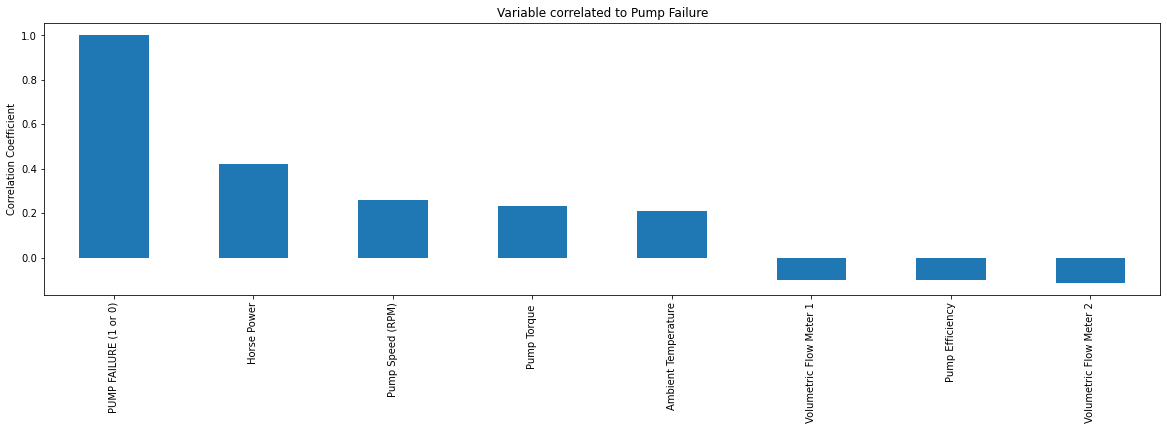

In [20]:
df_corr=df_corr.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
# df_corr=dataframe_raw.corr()
print(df_corr['PUMP FAILURE (1 or 0)'])
mpl.rcParams['figure.figsize'] = (20,5)
df_corr['PUMP FAILURE (1 or 0)'].plot(kind='bar',stacked=False)
plt.title('Variable correlated to Pump Failure')
plt.ylabel('Correlation Coefficient')

Horse power has highest correlation of 0.42 with pump Failure for Raw Data.

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the rolling standard deviation dataframe you had imported in Q1.

ii) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_stdev dataset.

Do any variables stand out? If yes, list these out below your heatmap.


## Please put your code here

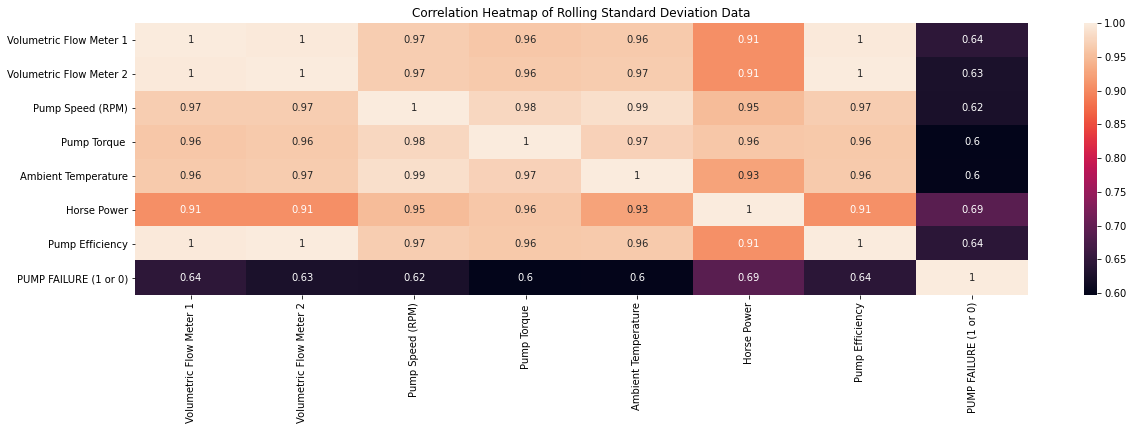

Text(0.5, 1.0, 'R Square Heatmap Rolling Standard Deviation data')

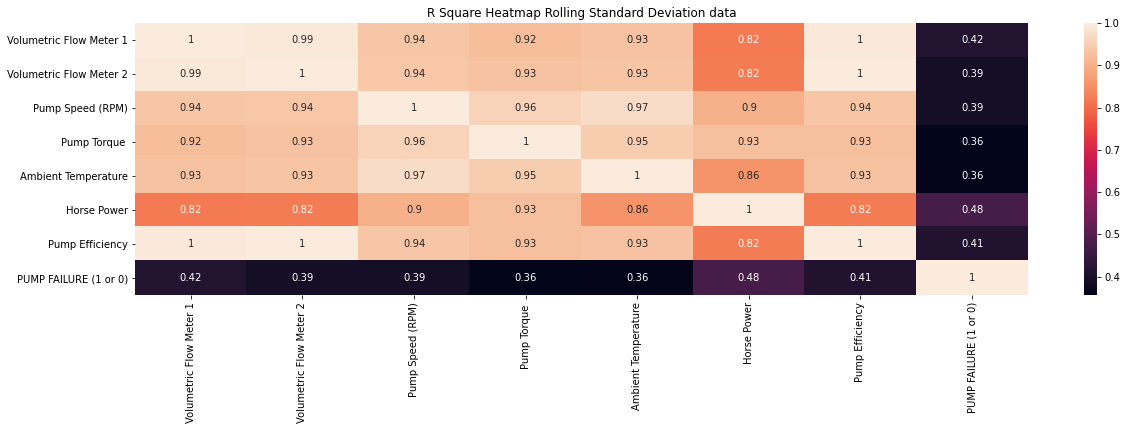

In [21]:
# plotting correlation heatmap
dataplot_stdev = sns.heatmap(dataframe_stdev.corr(), annot=True)
plt.title('Correlation Heatmap of Rolling Standard Deviation Data')
  
# displaying heatmap
plt.show()

# R Square stdev data
df_corrstdev= dataframe_stdev.corr()
df_corrstdev[:] **2
sns.heatmap(df_corrstdev[:] **2, annot=True)
plt.title('R Square Heatmap Rolling Standard Deviation data')

Horse power and Pump efficiency have highest correlation of 0.69 and 0.64 with pump Failure for Rolling Stdev Data.

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:
    ## Add a constant to follow the equation form: Ab + x (X = sm.add_constant(X))
    ## Instantiate the Ordinary Least Squares Model with: model = sm.OLS(Y,X) where Y is the dependent variable and X is the independent variable (Make sure you don't include the PUMP FAILURE (1 or 0) in your list of independent variables as this is what you are trying to predict)
    ## Fit the Model (OLSmodelResult = OLSmodel.fit())
    ## Print the OLSModel Summary 

Link: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

ii) Repeat i) but this time use the dataframe_stdev you imported previously. What is the R Squared for the model and what does this signify?



## Please put your code here 

In [22]:
# creating dependent Variable
Y = dataframe_raw['PUMP FAILURE (1 or 0)']
# Creating Independent Variable
X = dataframe_raw.drop(['Data Source','TIMEFRAME (DD/MM/YYYY)','PUMP FAILURE (1 or 0)'],axis=1)
X = sm.add_constant(X)

model_raw0= sm.OLS(Y,X)

OLSmodelResult_raw0 = model_raw0.fit()

OLSmodelResult_raw0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Fri, 22 Oct 2021   Prob (F-statistic):          5.58e-233
Time:                           16:01:25   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# creating dependent Variable
Y = dataframe_stdev['PUMP FAILURE (1 or 0)']
# Creating Independent Variable
X = dataframe_stdev.drop(['Data Source','TIMEFRAME (DD/MM/YYYY)','PUMP FAILURE (1 or 0)'],axis=1)
X = sm.add_constant(X)

model= sm.OLS(Y,X)

OLSmodelResult = model.fit()

OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                           16:01:25   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print('R Square for Stdev is : '+ str(OLSmodelResult.rsquared)
      +'which sighnifies high level of correlation and that regression model is good fit for this data for making accurate predictions')

R Square for Stdev is : 0.7781454401073606which sighnifies high level of correlation and that regression model is good fit for this data for making accurate predictions


**Open-ended Question:**

### Which linear regression model seems to be a better fit? Why do you think this is the case?


In [25]:
X

,const,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency
0,1.0,1.04,0.96,5.54,11.70,3.40,0.32,1.74
1,1.0,1.06,1.01,5.49,11.73,3.36,0.31,1.83
2,1.0,1.06,1.03,5.62,11.94,3.40,0.31,1.87
3,1.0,1.06,1.05,5.61,12.10,3.30,0.31,1.90
4,1.0,1.07,1.03,5.61,12.31,3.36,0.30,1.88
...,...,...,...,...,...,...,...,...
2447,1.0,1.36,0.90,4.68,14.10,2.80,0.42,1.63
2448,1.0,1.51,0.82,5.15,13.45,2.55,0.43,1.50
2449,1.0,1.57,0.93,5.35,14.86,2.65,0.47,1.70
2450,1.0,1.76,1.10,0.58,5.51,2.52,0.11,2.00


In [26]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2447    0
2448    0
2449    0
2450    0
2451    0
Name: PUMP FAILURE (1 or 0), Length: 2452, dtype: int64

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this.

## Please put your code here

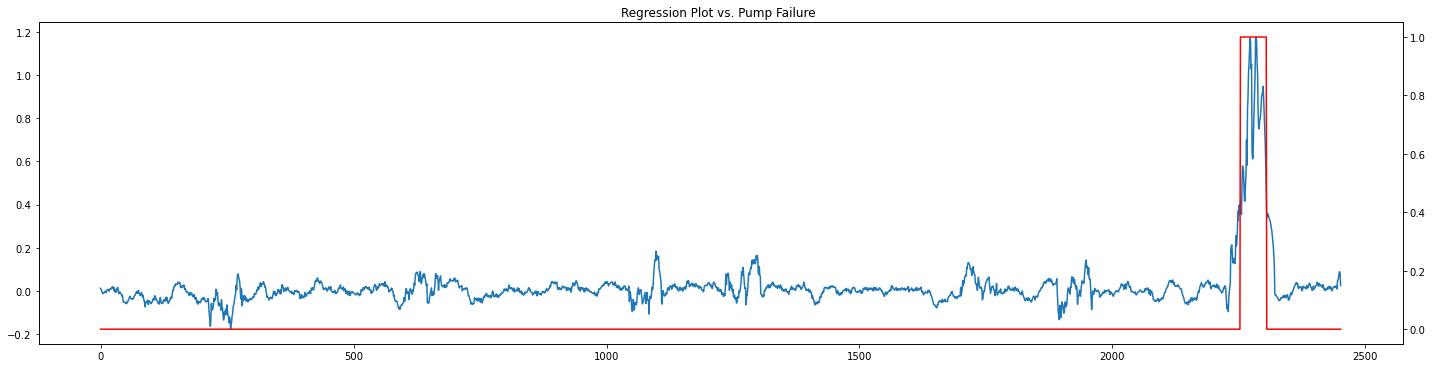

In [27]:
# OLSmodelResult.predict()
ax = OLSmodelResult.predict(X).plot()
ax2 = ax.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], 'r')
plt.tight_layout()
plt.title("Regression Plot vs. Pump Failure ")
plt.show()

You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

## Great job! Being able to complete this case study means that you're now proficient with the fundamentals of data analysis in Python!

In [28]:
# creating dependent Variable
Y = dataframe_stdev['PUMP FAILURE (1 or 0)']
# Creating Independent Variable
X = dataframe_stdev.drop(['Data Source','TIMEFRAME (DD/MM/YYYY)','PUMP FAILURE (1 or 0)'],axis=1)
# Split the dataset in training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# Train the model on the training set using LinearRegression
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,Y_train)

# Predict the test set results
Y_pred=ml.predict(X_test)
print(Y_pred)

[ 3.45505596e-02 -9.69254303e-03  1.32911565e-02  4.05538687e-02
  2.96295974e-02 -3.87670489e-02  1.68480122e-02  4.62073538e-02
  1.07109564e-01 -4.53775754e-02  4.70762813e-02  4.25696962e-01
  8.72221968e-03  2.92227790e-02 -1.38049290e-01 -4.35995993e-02
 -5.67873737e-03  1.00088098e-02  9.05629626e-03 -3.44670989e-02
  2.25682869e-02 -6.58660041e-03 -1.27446997e-02  1.21626506e-02
  1.10881844e-02 -1.76020220e-02 -2.06046200e-02  5.17491199e-03
 -3.29381997e-02 -5.83256266e-02  4.14422848e-02 -1.28492523e-02
 -5.33551949e-02  9.19680113e-03 -1.24538566e-02  1.99155170e-02
 -3.12706249e-03 -1.13906727e-03  2.75378461e-03  5.58221796e-02
 -2.80152121e-02 -6.40469176e-03 -2.42848227e-02  4.38647415e-02
  9.16325013e-03 -1.34523227e-02 -9.43291294e-05 -2.66935930e-03
  1.19119306e-02  7.50193140e-01 -5.05371208e-02  6.92838931e-03
  8.48138148e-03  1.61849514e-02  1.39974873e-01  1.44523434e-02
  2.98891241e-02 -1.47338218e-02 -5.30143447e-02  2.21824151e-02
 -1.67345024e-02 -1.77211

In [29]:
ml.predict([[1.04,0.96,5.54,11.70,3.40,0.32,1.74]])

array([0.01423457])

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [33]:
# Train the model on the training set using LogisticRegression
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train, Y_train)
pred=model.predict(X_test)

In [44]:
print(accuracy_score(Y_test, pred))
print(precision_score(Y_test, pred))
print(recall_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))

0.9945652173913043
0.9375
0.8333333333333334
[[717   1]
 [  3  15]]


In [42]:
from sklearn.metrics import plot_confusion_matrix

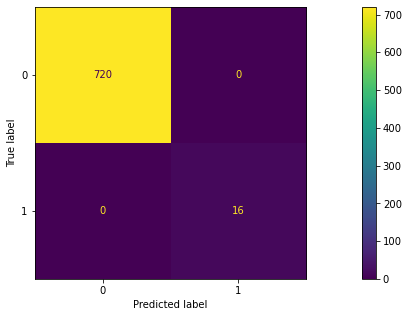

In [43]:
plot_confusion_matrix(model,X_test,pred)